In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
dataset_train = pd.read_csv('../../data/blogData_train.csv', header=None)
dataset_test = pd.read_csv('../../data/modified/blogData_test.csv', header=None)

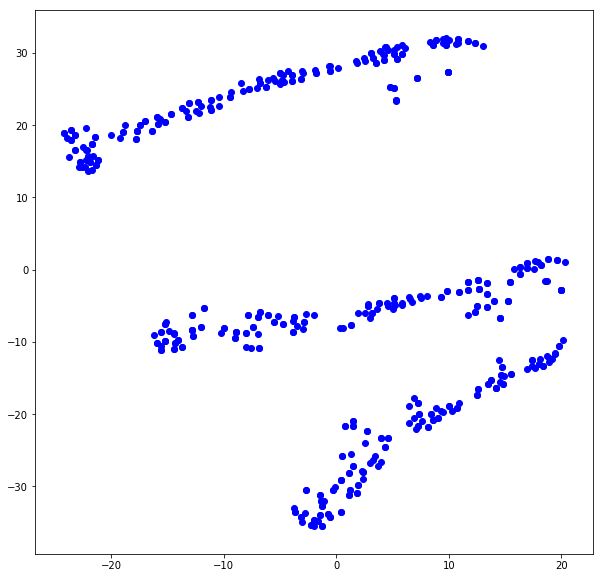

In [3]:
dados = dataset_train.iloc[:500, :-1]

from sklearn.manifold import TSNE
mpl.rcParams['figure.figsize'] = (10, 10)
tsne = TSNE(n_components=2)
graf = tsne.fit_transform(dados)

for xis in range(len(graf)):
    plt.scatter(graf[xis][0], graf[xis][1], c='blue')
plt.show()


In [4]:
print(dataset_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 281 entries, 0 to 280
dtypes: float64(281)
memory usage: 112.3 MB
None


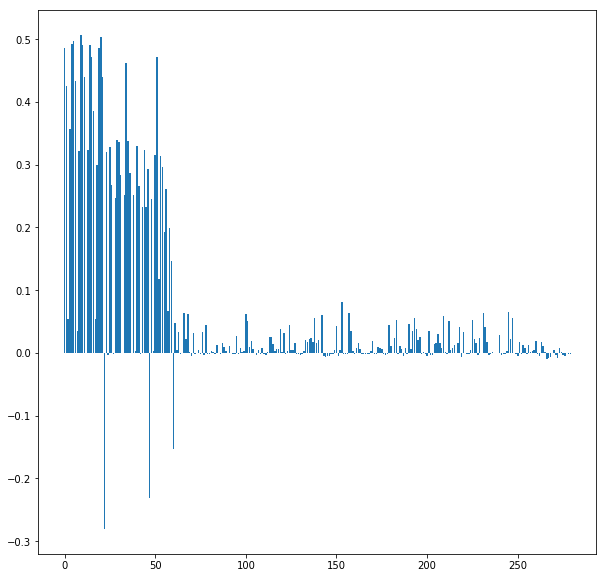

In [5]:
x_aux = np.arange(281)
y_aux = dataset_train.corr()[:][280] # individual correlation, variables with target

plt.bar(x_aux[0:-1], y_aux[0:-1])
plt.show()

## Attribute Information:

|        Line       |                                                                                                                                  Description                                                                                                                                  |
|:-----------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|  **1**...**50**   | Average, standard deviation, min, max and median of the  Attributes 51...60 for the source of the current blog post  With source we mean the blog on which the post appeared.  For example, myblog.blog.org would be the source of  the post myblog.blog.org/post_2010_09_10  |
|       **51**      |                                                                                                                   Total number of comments *before* basetime                                                                                                                  |
|       **52**      |                                                                                                         Number of comments in the last 24 hours *before* the basetime                                                                                                         |
|       **53**      |                                         Let T1 denote the datetime 48 hours *before* basetime,  Let T2 denote the datetime 24 hours *before* basetime.  This attribute is the number of comments in the time period  between T1 and T2                                        |
|       **54**      |                                                                                    Number of comments in the first 24 hours after the  publication of the blog post, but *before* basetime                                                                                    |
|       **55**      |                                                                                                                    The diference of attribute *52* and *53*                                                                                                                   |
|  **56**...**60**  |                                              The same features as the attributes *51*...*55*, but  features *56*...*60* refer to the number of links (trackbacks),  while features *51*...*55* refer to the number of comments.                                               |
|       **61**      |                                                                                                   The length of time between the publication of the blog post  and basetime                                                                                                   |
|       **62**      |                                                                                                                          The length of the blog post                                                                                                                          |
|  **63**...**262** |                                                                                              The 200 bag of *words* features for 200 frequent words of the  text of the blog post                                                                                             |
| **263**...**269** |                                                                                              binary indicator features (0 or 1) for the weekday (Monday...Sunday) of the basetime                                                                                             |
| **270**...**276** |                                                                              binary indicator features (0 or 1) for the weekday  (Monday...Sunday) of the date of publication of the blog  post                                                                               |
|      **277**      |                                                                          Number of parent pages: we consider a blog post P as a  parent of blog post B, if B is a reply (trackback) to  blog post P.                                                                          |
| **278**...**280** |                                                                                                     Minimum, maximum, average number of comments that the parents received                                                                                                    |
|      **281**      |                                                                                                The target: the number of comments in the next 24 hours  (relative to basetime)                                                                                                |
                                                                                                               |

In [6]:
x_train = dataset_train.iloc[:,0:-1]
y_train = dataset_train.iloc[:,-1]

x_test = dataset_test.iloc[:, 0:-1]
y_test = dataset_test.iloc[:,-1]

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
import time
from sklearn.metrics import mean_absolute_error

init = time.time()
gbr = GradientBoostingRegressor(n_estimators=500)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(gbr.score(x_test, y_test)))
print(cross_val_score(gbr,x_test, y_test,scoring='r2'))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

Execution time: 361.7616138458252 seconds
R2 score: 0.3503942437526931
[0.40607876 0.22070411 0.38665515]
MAE: 5.386097815415126


In [8]:
cv = cross_validate(gbr, x_test, y_test, cv=5)
print(cv)

{'fit_time': array([13.60633469, 13.8344512 , 14.87194586, 15.41609359, 15.40888524]), 'score_time': array([0.01156211, 0.01268601, 0.01180339, 0.0122757 , 0.010499  ]), 'test_score': array([0.2781883 , 0.41337466, 0.04515694, 0.37079635, 0.44686991]), 'train_score': array([0.96777883, 0.9676893 , 0.96415489, 0.95700407, 0.96733494])}


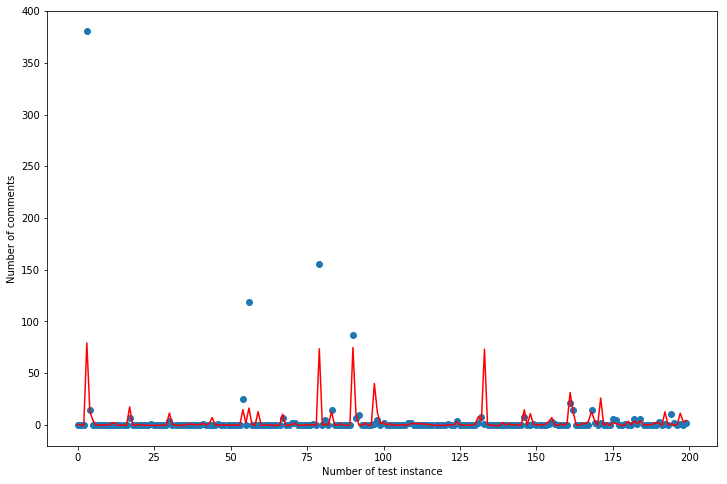

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.xlabel('Number of test instance') # Set x label
plt.ylabel('Number of comments') # Set y label
plt.show()